In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
ratings = pd.read_csv('./all_airways_rating.csv')

In [45]:
ratings.head()

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,Nov-19,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,Jun-19,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,Jun-19,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,Sep-19,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,Sep-19,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


### Filtering needed airlines

In [46]:
ratings['Airline Name'].unique()

array(['AB Aviation', 'Adria Airways', 'Aegean Airlines', 'Aer Lingus',
       'Aero VIP', 'Aerocaribbean', 'Aeroflot Russian Airlines',
       'AeroItalia', 'Aerolineas Argentinas', 'Aeromar', 'Aeromexico',
       'Aerosur', 'Africa World Airlines', 'Afriqiyah Airways',
       'Aigle Azur', 'Air Algerie', 'Air Antilles', 'Air Arabia',
       'Air Astana', 'Air Austral', 'Air Bagan', 'Air Berlin',
       'Air Botswana', 'Air Burkina', 'Air Busan', 'Air Cairo',
       'Air Canada', 'Air Canada rouge', 'Air Caraibes', 'Air China',
       'Air Corsica', 'Air Costa', "Air Cote d'Ivoire", 'Air Djibouti',
       'Air Dolomiti', 'Air Europa', 'Air France', 'Air Greenland',
       'Air Iceland Connect', 'Air India', 'Air India Express',
       'Air Italy', 'Air Juan', 'Air KBZ', 'Air Koryo', 'Air Labrador',
       'Air Macau', 'Air Madagascar', 'Air Malawi', 'Air Malta',
       'Air Mauritius', 'Air Mediterranee', 'Air Memphis', 'Air Moldova',
       'Air Namibia', 'Air New Zealand', 'Air Niug

In [49]:
airline_names = ['British Airways', 'Emirates', 'easyJet', 'Jet2.com', 'TUI Airways']
df = ratings[ratings['Airline Name'].isin(airline_names)]
df.head()

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
6019,6019,British Airways,1,"""lives in their past glory""",26th July 2023,True,An airline that lives in their past glory and...,A321,Family Leisure,Business Class,Madrid to London,Jul-23,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
6020,6020,British Airways,2,"""Check-in Desk rude and dismissive""",26th July 2023,True,Check-in Desk rude and dismissive. Flight la...,NaN,Family Leisure,Economy Class,Rhodes to Gatwick,Jul-23,2.0,3.0,1.0,1.0,1.0,1.0,2.0,no
6021,6021,British Airways,1,"""All in all, terrible""",25th July 2023,True,I chose British Airways especially because I ...,NaN,Family Leisure,Economy Class,Barcelona to London,Jul-23,1.0,4.0,1.0,1.0,1.0,1.0,1.0,no
6022,6022,British Airways,1,"""cancelled the rebooked flight""",24th July 2023,False,I booked Premium Economy from INV to LAX (via...,NaN,Couple Leisure,Premium Economy,Inverness to Los Angeles via London,Nov-22,NaN,NaN,NaN,NaN,NaN,NaN,1.0,no
6023,6023,British Airways,1,"""Zero empathy was shown""",21st July 2023,True,A simple story with an unfortunate outcome th...,NaN,Couple Leisure,Economy Class,London City Airport to Frankfurt,Jul-23,3.0,3.0,NaN,1.0,NaN,NaN,1.0,no


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 473 entries, 6019 to 21010
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              473 non-null    int64  
 1   Airline Name            473 non-null    object 
 2   Overall_Rating          473 non-null    object 
 3   Review_Title            473 non-null    object 
 4   Review Date             473 non-null    object 
 5   Verified                473 non-null    bool   
 6   Review                  473 non-null    object 
 7   Aircraft                208 non-null    object 
 8   Type Of Traveller       473 non-null    object 
 9   Seat Type               473 non-null    object 
 10  Route                   471 non-null    object 
 11  Date Flown              473 non-null    object 
 12  Seat Comfort            444 non-null    float64
 13  Cabin Staff Service     442 non-null    float64
 14  Food & Beverages        343 non-null    fl

In [51]:
#df.to_csv('5airways.csv')

In [11]:
df = pd.read_csv('./5airways.csv')

In [12]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,...,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,6019,6019,British Airways,1,"""lives in their past glory""",26th July 2023,True,An airline that lives in their past glory and...,A321,Family Leisure,...,Madrid to London,Jul-23,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
1,6020,6020,British Airways,2,"""Check-in Desk rude and dismissive""",26th July 2023,True,Check-in Desk rude and dismissive. Flight la...,NaN,Family Leisure,...,Rhodes to Gatwick,Jul-23,2.0,3.0,1.0,1.0,1.0,1.0,2.0,no
2,6021,6021,British Airways,1,"""All in all, terrible""",25th July 2023,True,I chose British Airways especially because I ...,NaN,Family Leisure,...,Barcelona to London,Jul-23,1.0,4.0,1.0,1.0,1.0,1.0,1.0,no
3,6022,6022,British Airways,1,"""cancelled the rebooked flight""",24th July 2023,False,I booked Premium Economy from INV to LAX (via...,NaN,Couple Leisure,...,Inverness to Los Angeles via London,Nov-22,NaN,NaN,NaN,NaN,NaN,NaN,1.0,no
4,6023,6023,British Airways,1,"""Zero empathy was shown""",21st July 2023,True,A simple story with an unfortunate outcome th...,NaN,Couple Leisure,...,London City Airport to Frankfurt,Jul-23,3.0,3.0,NaN,1.0,NaN,NaN,1.0,no


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0.1            473 non-null    int64  
 1   Unnamed: 0              473 non-null    int64  
 2   Airline Name            473 non-null    object 
 3   Overall_Rating          473 non-null    int64  
 4   Review_Title            473 non-null    object 
 5   Review Date             473 non-null    object 
 6   Verified                473 non-null    bool   
 7   Review                  473 non-null    object 
 8   Aircraft                208 non-null    object 
 9   Type Of Traveller       473 non-null    object 
 10  Seat Type               473 non-null    object 
 11  Route                   471 non-null    object 
 12  Date Flown              473 non-null    object 
 13  Seat Comfort            444 non-null    float64
 14  Cabin Staff Service     442 non-null    fl

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0.1,473.0,10679.496829,4832.096415,6019.0,8270.0,8702.0,12122.00,21010.0
Unnamed: 0,473.0,10679.496829,4832.096415,6019.0,8270.0,8702.0,12122.00,21010.0
Overall_Rating,473.0,2.723044,2.673124,1.0,1.0,1.0,4.00,9.0
Seat Comfort,444.0,2.700450,1.463753,1.0,1.0,3.0,4.00,5.0
Cabin Staff Service,442.0,3.004525,1.632987,1.0,1.0,3.0,5.00,5.0
Food & Beverages,343.0,2.655977,1.503801,1.0,1.0,3.0,4.00,5.0
Ground Service,458.0,2.451965,1.629490,1.0,1.0,2.0,4.00,5.0
Inflight Entertainment,235.0,2.514894,1.586128,1.0,1.0,2.0,4.00,5.0
Wifi & Connectivity,168.0,1.595238,1.179861,1.0,1.0,1.0,1.25,5.0
Value For Money,473.0,2.503171,1.599951,1.0,1.0,2.0,4.00,5.0


In [15]:
columns_to_drop = ['Unnamed: 0.1', 'Unnamed: 0','Review_Title','Review Date','Verified','Review','Aircraft','Type Of Traveller','Route','Date Flown',
                             ]

In [16]:
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,Airline Name,Overall_Rating,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,British Airways,1,Business Class,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
1,British Airways,2,Economy Class,2.0,3.0,1.0,1.0,1.0,1.0,2.0,no
2,British Airways,1,Economy Class,1.0,4.0,1.0,1.0,1.0,1.0,1.0,no
3,British Airways,1,Premium Economy,NaN,NaN,NaN,NaN,NaN,NaN,1.0,no
4,British Airways,1,Economy Class,3.0,3.0,NaN,1.0,NaN,NaN,1.0,no


### Making value for money table

In [17]:
average_value_for_money = df.groupby('Airline Name')['Value For Money'].mean()
value_for_money = pd.DataFrame({'Airline Name': average_value_for_money.index, 'Average Value For Money': average_value_for_money.values})
value_for_money.set_index('Airline Name', inplace=True)

In [18]:
value_for_money

,Average Value For Money
Airline Name,
British Airways,1.810000
Emirates,2.560000
Jet2.com,3.270000
TUI Airways,3.054795
easyJet,1.970000


In [19]:
#value_for_money.to_csv('value_for_money.csv')

In [38]:
column_to_avg = ['Overall_Rating']
average_rating = df.groupby('Airline Name')[column_to_avg].mean()
average_rating

,Overall_Rating
Airline Name,
British Airways,2.400000
Emirates,3.230000
Jet2.com,2.760000
TUI Airways,3.643836
easyJet,1.830000


In [37]:
column_to_avg = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money']
average_ratings = df.groupby('Airline Name')[columns_to_avg].mean()
average_ratings

,Overall_Rating
Airline Name,
British Airways,2.400000
Emirates,3.230000
Jet2.com,2.760000
TUI Airways,3.643836
easyJet,1.830000


### Checking recommendations

In [29]:
reviews_count = df['Airline Name'].value_counts()
reviews_count

Airline Name
British Airways    100
easyJet            100
Emirates           100
Jet2.com           100
TUI Airways         73
Name: count, dtype: int64

### Making table for heatmap 'services'

In [34]:
df

,Airline Name,Overall_Rating,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,British Airways,1,Business Class,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
1,British Airways,2,Economy Class,2.0,3.0,1.0,1.0,1.0,1.0,2.0,no
2,British Airways,1,Economy Class,1.0,4.0,1.0,1.0,1.0,1.0,1.0,no
3,British Airways,1,Premium Economy,NaN,NaN,NaN,NaN,NaN,NaN,1.0,no
4,British Airways,1,Economy Class,3.0,3.0,NaN,1.0,NaN,NaN,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...
468,TUI Airways,1,Economy Class,1.0,2.0,1.0,3.0,1.0,NaN,1.0,no
469,TUI Airways,8,Economy Class,4.0,5.0,4.0,5.0,4.0,NaN,5.0,yes
470,TUI Airways,1,Economy Class,4.0,5.0,NaN,4.0,NaN,NaN,4.0,yes
471,TUI Airways,9,Economy Class,4.0,5.0,3.0,5.0,NaN,NaN,4.0,yes


In [40]:
services_columns = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 
                    'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money']
services_and_value_df = df[['Airline Name'] + services_columns]

In [41]:
average_values = services_and_value_df.groupby('Airline Name').mean()
average_values.reset_index(inplace=True)

In [42]:
average_values

,Airline Name,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money
0,British Airways,2.446809,2.765957,2.259259,2.061856,2.474576,1.695652,1.810000
1,Emirates,2.968750,2.926316,2.900000,2.632653,3.400000,1.927273,2.560000
2,Jet2.com,3.139785,3.645161,2.970149,3.221053,1.166667,1.478261,3.270000
3,TUI Airways,2.902778,3.458333,2.875000,2.643836,2.548387,1.333333,3.054795
4,easyJet,2.056180,2.295455,2.183673,1.747368,1.032258,1.062500,1.970000


In [60]:
service_categories = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
                      'Ground Service', 'Inflight Entertainment',
                      'Wifi & Connectivity', 'Value For Money']

# Initialize an empty list to store data for the new DataFrame
new_data = []

# Iterate through each service category
for service in service_categories:
    # Group by 'Airline Name' and calculate the mean value for the service category
    service_data = df.groupby('Airline Name')[service].mean().reset_index()
    
    # Rename the columns for consistency
    service_data.rename(columns={service: 'Value'}, inplace=True)
    
    # Add the service category column
    service_data['Service'] = service
    
    # Append the service data to the new_data list
    new_data.append(service_data)

# Concatenate the data from the list into a new DataFrame
new_df = pd.concat(new_data, ignore_index=True)

In [61]:
new_df

,Airline Name,Value,Service
0,British Airways,2.446809,Seat Comfort
1,Emirates,2.968750,Seat Comfort
2,Jet2.com,3.139785,Seat Comfort
3,TUI Airways,2.902778,Seat Comfort
4,easyJet,2.056180,Seat Comfort
5,British Airways,2.765957,Cabin Staff Service
6,Emirates,2.926316,Cabin Staff Service
7,Jet2.com,3.645161,Cabin Staff Service
8,TUI Airways,3.458333,Cabin Staff Service
9,easyJet,2.295455,Cabin Staff Service


In [62]:
#new_df.to_csv('compare_service_ratings_5airlines.csv')

### Visualizations

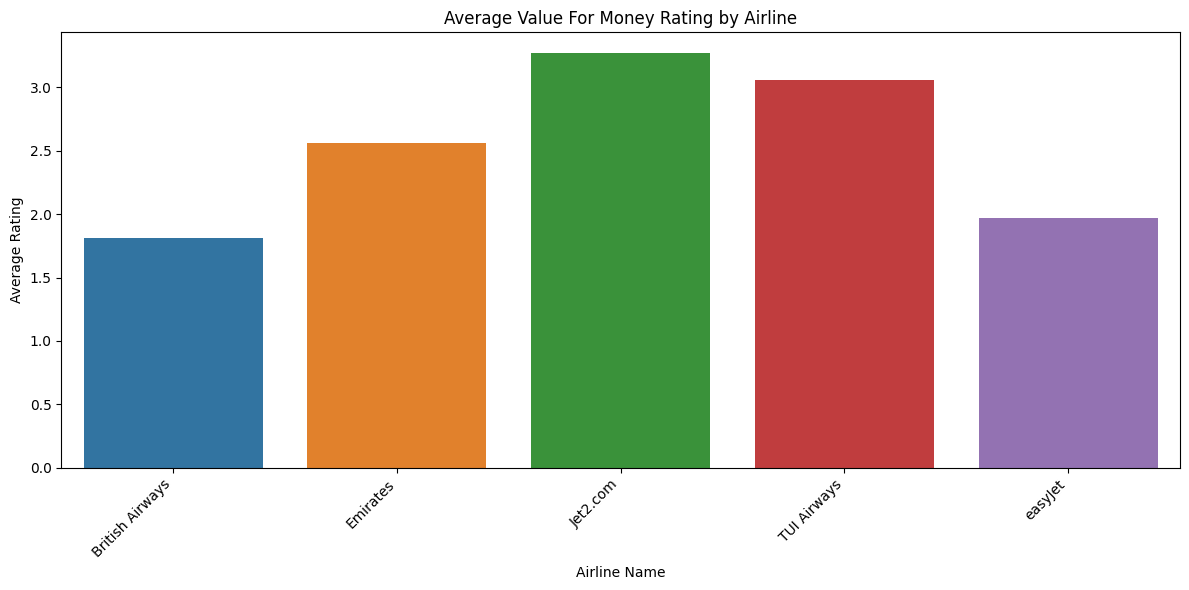

In [22]:
plt.figure(figsize=(12, 6))

sns.barplot(data=average_ratings.reset_index(), x='Airline Name', y='Value For Money')

plt.xlabel('Airline Name')
plt.ylabel('Average Rating')
plt.title('Average Value For Money Rating by Airline')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

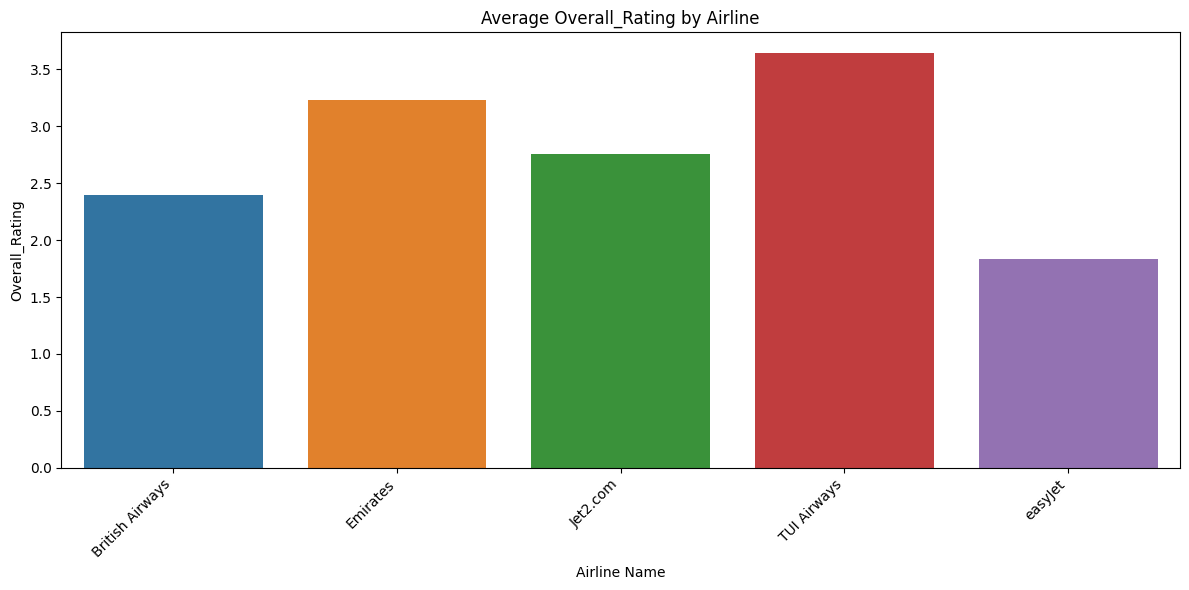

In [39]:
plt.figure(figsize=(12, 6))

sns.barplot(data=average_rating.reset_index(), x='Airline Name', y='Overall_Rating')

plt.xlabel('Airline Name')
plt.ylabel('Overall_Rating')
plt.title('Average Overall_Rating by Airline')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

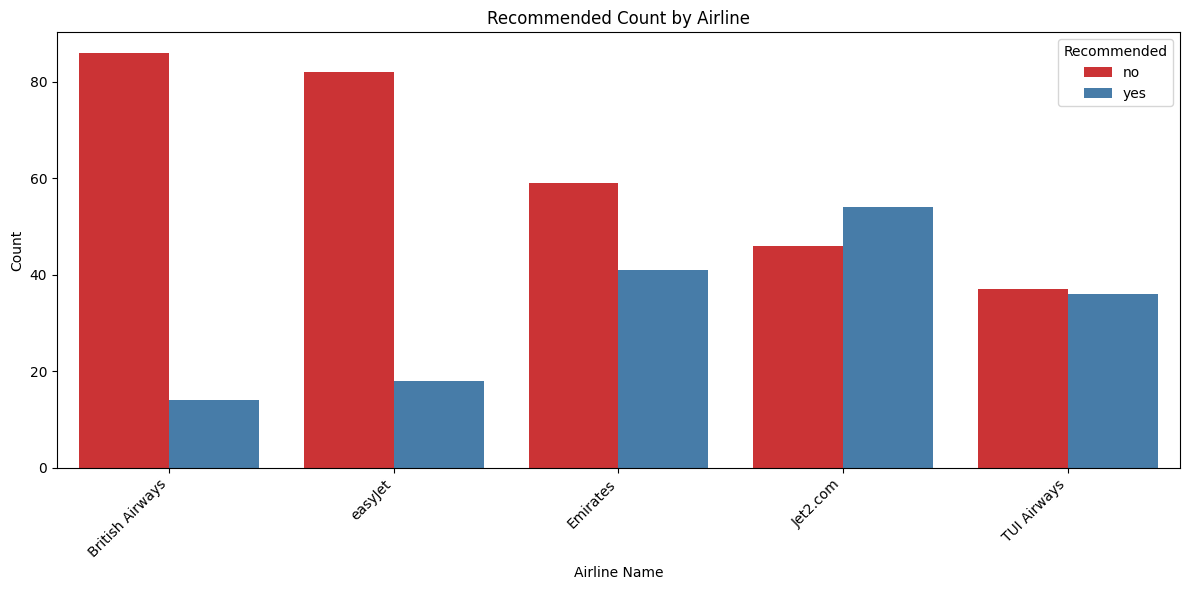

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Airline Name', hue='Recommended', palette='Set1')

plt.xlabel('Airline Name')
plt.ylabel('Count')
plt.title('Recommended Count by Airline')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Recommended')
plt.tight_layout()
plt.show()

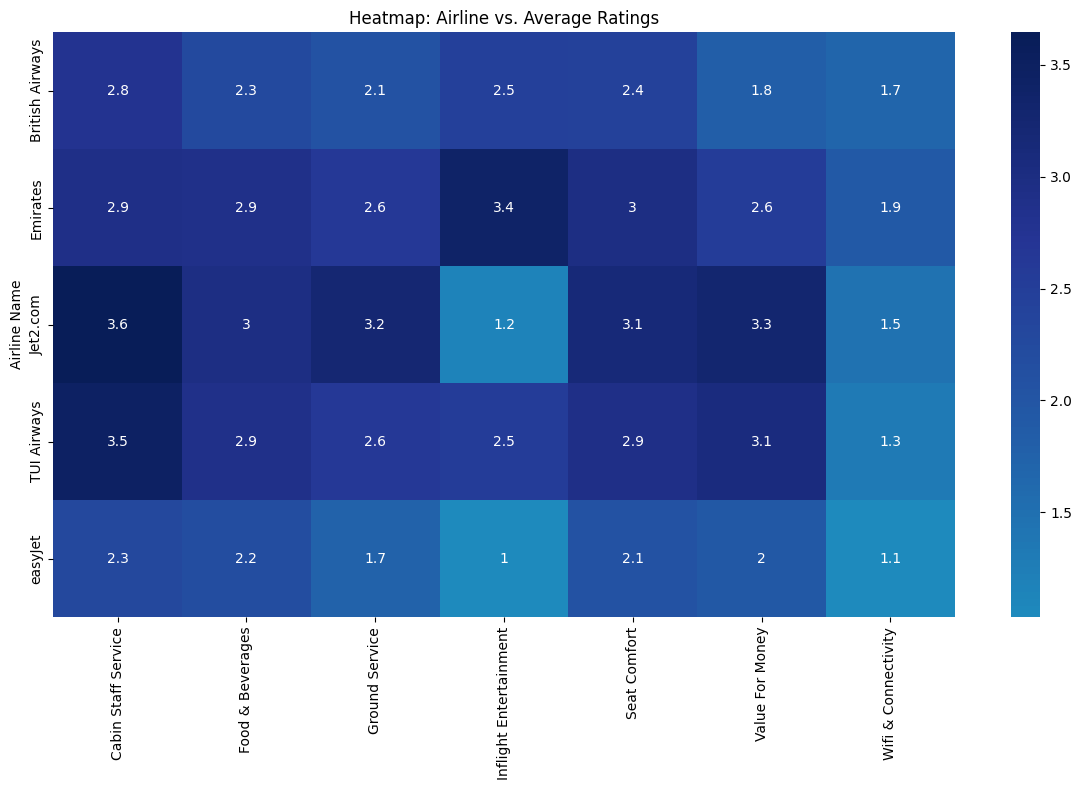

In [26]:
plt.figure(figsize=(12, 8))

pivot_table = df.pivot_table(index='Airline Name', values=columns_to_avg)
sns.heatmap(data=pivot_table, annot=True, cmap='YlGnBu', center=0)

plt.title('Heatmap: Airline vs. Average Ratings')

plt.tight_layout()
plt.show()